<a href="https://colab.research.google.com/github/ThatManRong/APM466_A1/blob/main/APM466_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.optimize as optimize

In [148]:

# for count, row in df.iterrows():
#         Face = row['Face']
#         Freq = row['Freq']
#         N = row['N']
#         C = row['C']
#         Mkt_Price = row['Mkt_Price']
#         row['Yield'] = scipy.optimize.newton(Px, .1, tol=.0001, maxiter=100)

def YTM(price,accrued_month,coupon_rate, compounding_period, deferred_start):
  px = lambda Rate: price + coupon_rate*100*accrued_month/12 - (100 * ( 1 + Rate / 2 ) ** ( - compounding_period ) + ( coupon_rate / Rate ) * ( 1 - (1 + ( Rate / 2 )) ** -compounding_period ))*((1 + ( Rate / 2 )) ** -deferred_start )

  return scipy.optimize.newton(px, .05, tol=.000001, maxiter=100)

def dcf(amt, ytm, period):
  return amt/(1+ytm/2)**period 

def get_bond_price(daycount, num_coupon, c, ytm):
  dirty_price = 0
  w = daycount/183
  for i in range(num_coupon):
    dirty_price += dcf(100*c/2, ytm, w)
    w+= 1
  dirty_price += dcf(100, ytm, w-1)

  accrued_interest = (183-daycount)/365 * c * 100

  return dirty_price - accrued_interest

def get_yield(daycount, num_coupon, c, price, guess = 0.05):
  yieldd = lambda ytm: get_bond_price(daycount, num_coupon, c, ytm) - price
  return optimize.newton(yieldd, guess,tol=.000001,maxiter=100)

In [149]:
coupon1 = float(bond1['coupon'])
p11 = float(bond1[date[i]])
y11 = get_yield(0, 2, coupon1, p11, guess = 0.05)
print(y11)

0.0009522190101087708


In [154]:
def ytm_for_eachday(bond1,bond2,bond3,bond4,bond5,bond6,bond7,bond8,bond9,bond10,date):
    ytm_list = [[],[],[],[],[],[],[],[],[],[]]

    for i in range(len(date)):
        #bond1
        p11 = float(bond1[date[i]])
        coupon1 = float(bond1['coupon'])
        # y11 = YTM(p11,accrued_month = 6,coupon_rate = coupon1,compounding_period = 1, deferred_start = 0)
        # print(y11)
        y11 = get_yield(0, 2, coupon1, p11, guess = 0.05)
        # print(y11)
        ytm_list[i].append(round(y11,4))
        #print(y11)

        #bond2
        p12 = float(bond2[date[i]])
        coupon2 = float(bond2['coupon'])
        # y12 = YTM(p12,accrued_month = 6,coupon_rate = coupon2,compounding_period = 2, deferred_start = 0)
        y12 = get_yield(0, 3, coupon2, p12, guess = 0.05)
        ytm_list[i].append(round(y12,4))

        #bond3
        p13 = float(bond3[date[i]])
        coupon3 = float(bond3['coupon'])
        #y13 = YTM(p13,accrued_month = 6,coupon_rate = coupon3,compounding_period = 3, deferred_start = 0)
        y13 = get_yield(0, 4, coupon3, p13, guess = 0.05)
        ytm_list[i].append(round(y13,4))

        #bond4
        p14 = float(bond4[date[i]])
        coupon4 = float(bond4['coupon'])
        #y14 = YTM(p14,accrued_month = 6,coupon_rate = coupon4,compounding_period = 4, deferred_start = 0)
        y14 = get_yield(0, 5, coupon4, p14, guess = 0.05)
        ytm_list[i].append(round(y14,4))

        #bond5
        p15 = float(bond5[date[i]])
        coupon5 = float(bond5['coupon'])
        #y15 = YTM(p15,accrued_month = 2,coupon_rate = coupon5,compounding_period = 5, deferred_start = 0.6666666)
        y15 = get_yield(120, 5, coupon5, p15, guess = 0.05)

        ytm_list[i].append(round(y15,4))

        #bond6
        p16 = float(bond6[date[i]])
        coupon6 = float(bond6['coupon'])
        #y16 = YTM(p16,accrued_month = 5,coupon_rate = coupon6,compounding_period = 6, deferred_start = 0.1666666)
        y16 = get_yield(28, 7, coupon6, p16, guess = 0.05)
        ytm_list[i].append(round(y16,4))

        #bond7
        p17 = float(bond7[date[i]])
        coupon7 = float(bond7['coupon'])
        # y17 = YTM(p17,accrued_month = 5,coupon_rate = coupon7,compounding_period = 7, deferred_start = 0.1666666)
        y17 = get_yield(28, 8, coupon7, p17, guess = 0.05)

        ytm_list[i].append(round(y17,4))

        #bond8
        p18 = float(bond8[date[i]])
        coupon8 = float(bond8['coupon'])
        # y18 = YTM(p18,accrued_month = 5,coupon_rate = coupon8,compounding_period = 8, deferred_start = 0.1666666)
        y18 = get_yield(28, 9, coupon8, p18, guess = 0.05)
        ytm_list[i].append(round(y18,4))

        #bond9
        p19 = float(bond9[date[i]])
        coupon9 = float(bond9['coupon'])
        # y19 = YTM(p19,accrued_month = 5,coupon_rate = coupon9,compounding_period = 9, deferred_start = 0.1666666)
        y19 = get_yield(28, 10, coupon9, p19, guess = 0.05)
        ytm_list[i].append(round(y19,4))
        #bond10
        p110 = float(bond10[date[i]])
        coupon10 = float(bond10['coupon'])
        # y110 = YTM(p110,accrued_month = 5,coupon_rate = coupon10,compounding_period = 10, deferred_start = 0.1666666)
        y110 = get_yield(28, 11, coupon10, p110, guess = 0.05)
        ytm_list[i].append(round(y110,4))

    return ytm_list


In [157]:
def spot_for_eachday(ytm_list,date, T):
    spot_list = [[],[],[],[],[],[],[],[],[],[]]
    for i in range(len(date)):
      for t in range(0,10):
        if t<=3:
          spot_list[i].append(ytm_list[i][t])
        elif t == 4:
          spot_list[i].append(ytm_list[i][t]+(ytm_list[i][t+1] - ytm_list[i][t])*(2/9))

        elif t == 5:
          spot_list[i].append(ytm_list[i][t-1]+(ytm_list[i][t] - ytm_list[i][t])*(8/9))
        else:
          spot_list[i].append(ytm_list[i][t-1]+(ytm_list[i][t] - ytm_list[i][t])*(5/6))
    return spot_list


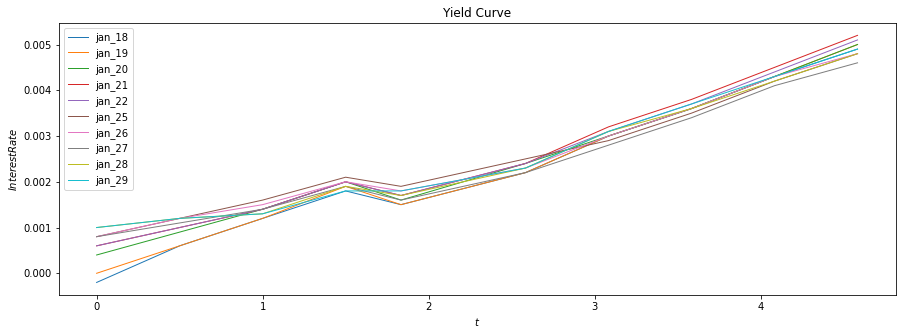

In [161]:
data = pd.read_excel('apm466_a1_data.xlsx')
bond1 = data.loc[data['ISIN'] == 'CA135087K296']
bond2 = data.loc[data['ISIN'] == 'CA135087K601']
bond3 = data.loc[data['ISIN'] == 'CA135087L286']
bond4 = data.loc[data['ISIN'] == 'CA135087L773']
bond5 = data.loc[data['ISIN'] == 'CA135087A610']
bond6 = data.loc[data['ISIN'] == 'CA135087J546']
bond7 = data.loc[data['ISIN'] == 'CA135087J967']
bond8 = data.loc[data['ISIN'] == 'CA135087K528']
bond9 = data.loc[data['ISIN'] == 'CA135087K940']
bond10 = data.loc[data['ISIN'] == 'CA135087L518']
date = ['jan_18', 'jan_19', 'jan_20', 'jan_21', 'jan_22', 'jan_25', 'jan_26', 'jan_27', 'jan_28', 'jan_29']
#Daycount = [43, 42, 41, 40, 39, 36, 35, 34, 33, 29]  # num of days between settlement date and 3/1/2020
T = [[],[],[],[],[],[],[],[],[],[]]
for i in range(10):
    for j in range(10):
        # if j == 0:
        #     T[i].append(Daycount[i] / 365)
        # elif j==3 or j == 5:
        #     T[i].append(T[i][j - 1] + 0.25)
        # elif j==4 or j==6:
        #     T[i].append(T[i][j - 1] + 0.75)
        # else:
        #     T[i].append(T[i][j-1] + 0.5)
        if j == 0:
          T[i].append(0)
        elif j == 4:
          T[i].append(T[i][j - 1] + 0.33333) 
        elif j == 5:
          T[i].append(T[i][j - 1] + 9/12) 
        else:
          T[i].append(T[i][j - 1] + 0.5)

legend = ['jan_18', 'jan_19', 'jan_20', 'jan_21', 'jan_22', 'jan_25', 'jan_26', 'jan_27', 'jan_28', 'jan_29']
ytm_list = ytm_for_eachday(bond1, bond2, bond3, bond4, bond5, bond6, bond7, bond8, bond9, bond10, date)
fig = plt.figure(figsize=(15,5))
for i in range(10):
  plt.plot(T[i],ytm_list[i], linewidth=1)
plt.xlabel('$t$')
plt.ylabel('$Interest Rate$')
plt.legend(legend)
plt.title("Yield Curve")


# yield curve
# fi, fg = plt.subplots(3)
# ytm_list = ytm_for_eachday(bond1, bond2, bond3, bond4, bond5, bond6, bond7, bond8, bond9, bond10, bond11, date)
# for i in range(10):
#     fg[0].plot(T[i],ytm_list[i],label = legend[i])
#     fg[0].legend(loc='upper right',bbox_to_anchor=(1.1,1.5))

# fg[0].set_title('Yield Curve')
# fg[0].set_xlabel('Time')
# fg[0].set_ylabel('Interest Rate')

# get yield for 1-5 year
yield_1to5 = [[],[],[],[],[],[],[],[],[],[]]
for i in range(10):
    for j in range(5):
        inter_yield= np.interp(j+1, T[i],ytm_list[i])
        yield_1to5[i].append(round(inter_yield,4))
#print(yield_1to5)




Text(0.5, 1.0, 'Spot Curve')

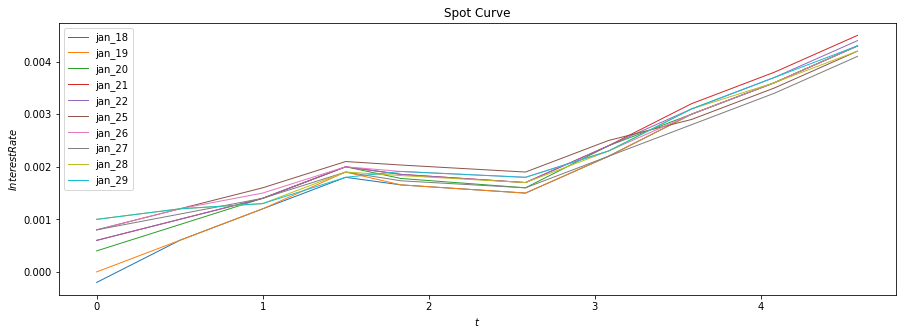

In [162]:
# spot curve
spot_list = spot_for_eachday(ytm_list, date,T)

fig = plt.figure(figsize=(15,5))
for i in range(10):
  plt.plot(T[i],spot_list[i], linewidth=1)
plt.xlabel('$t$')
plt.ylabel('$Interest Rate$')
plt.legend(legend)
plt.title("Spot Curve")

In [167]:
time = [[],[],[],[],[],[],[],[],[],[]]
for i in range(10):
  for j in range(10):
    time[i].append(j/2)

Text(0.5, 1.0, 'Forward Curve')

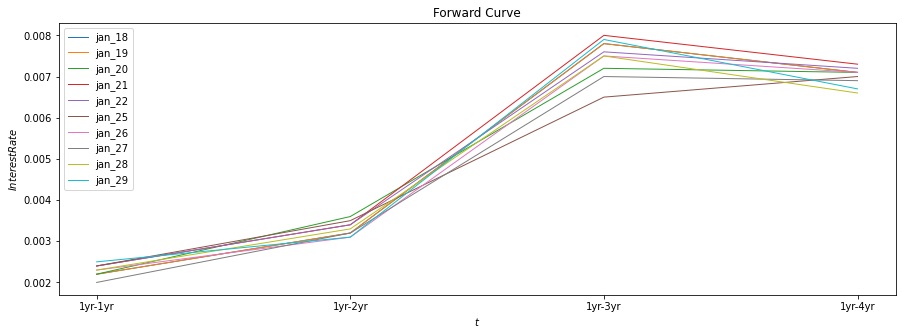

In [177]:
# get 1-5 yr spot rate
spot_1to5 = [[],[],[],[],[],[],[],[],[],[]]
for i in range(10):
    for j in range(5):
        inter = np.interp(j+1, time[i],spot_list[i])
        spot_1to5[i].append(round(inter,4))
#print(spot_1to5)

# forward curve
forward_list = [[],[],[],[],[],[],[],[],[],[]]
for i in range(10):
    for j in range(4):
        if j == 0:
          forward_rate = (((1+spot_1to5[i][j+1])**(j+2))/(1+spot_1to5[i][0])) - 1
        elif j == 1:
          forward_rate = (((1+spot_1to5[i][j+1])**(j+2))/((1+spot_1to5[i][0])*(1+forward_list[i][0]))) - 1
        elif j == 2:
          forward_rate = (((1+spot_1to5[i][j+1])**(j+2))/((1+spot_1to5[i][0])*(1+forward_list[i][0])*(1+forward_list[i][1]))) - 1
        elif j == 3:
          forward_rate = (((1+spot_1to5[i][j+1])**(j+2))/((1+spot_1to5[i][0])*(1+forward_list[i][0])*(1+forward_list[i][1])*(1+forward_list[i][2]))) - 1
        forward_list[i].append(round(forward_rate,4))
#print(forward_list)

fig = plt.figure(figsize=(15,5))
for i in range(10):
  plt.plot(['1yr-1yr','1yr-2yr','1yr-3yr','1yr-4yr'],forward_list[i], linewidth=1)
plt.xlabel('$t$')
plt.ylabel('$Interest Rate$')
plt.legend(legend)
plt.title("Forward Curve")



# for i in range(10):
#     fg[2].plot(['1yr-1yr','1yr-2yr','1yr-3yr','1yr-4yr'],forward_list[i],label = legend[i])
#     fg[2].legend(loc='upper right', bbox_to_anchor=(1.1, 1))
# fg[2].set_title('Forward Curve')
# fg[2].set_xlabel('Time')
# fg[2].set_ylabel('Interest Rate')
# plt.show()


In [179]:
yield_1to5 = [[],[],[],[],[],[],[],[],[],[]]
for i in range(10):
    for j in range(5):
        inter_yield= np.interp(j+1, time[i],ytm_list[i])
        yield_1to5[i].append(round(inter_yield,4))
print(yield_1to5)

[[0.0012, 0.0015, 0.003, 0.0043, 0.0049], [0.0012, 0.0015, 0.003, 0.0043, 0.005], [0.0014, 0.0016, 0.003, 0.0043, 0.005], [0.0014, 0.0017, 0.0032, 0.0045, 0.0052], [0.0014, 0.0017, 0.0031, 0.0044, 0.0051], [0.0016, 0.0019, 0.0029, 0.0042, 0.0048], [0.0015, 0.0018, 0.003, 0.0043, 0.0048], [0.0014, 0.0016, 0.0028, 0.0041, 0.0046], [0.0013, 0.0017, 0.0031, 0.0042, 0.0048], [0.0013, 0.0018, 0.0031, 0.0043, 0.0049]]


In [180]:
ret_list = [[],[],[],[],[]]
for i in range(5):
    for j in range(9):
        ret = math.log(yield_1to5[j+1][i]/yield_1to5[j][i])
        ret_list[i].append(ret)
x = np.array(ret_list)
cov1 = np.cov(x)

forward_array = [[],[],[],[]]
for i in range(4):
    for j in range(9):
        forward_array[i].append(math.log(forward_list[j+1][i]/forward_list[j][i]))
y = np.array(forward_array)
cov2 = np.cov(y)
print(cov1)
print(cov2)
# calculate eigenvalues and eigenvectors. 
eigval1,eigvec1 = np.linalg.eig(cov1)
eigval2,eigvec2 = np.linalg.eig(cov2)
print(eigval1)
print(eigvec1)
print(eigval2)
print(eigvec2)

[[ 0.0069123   0.00378776 -0.00177098 -0.00077879 -0.00103912]
 [ 0.00378776  0.0050321   0.00103679  0.00059067  0.00055078]
 [-0.00177098  0.00103679  0.00322132  0.00166081  0.00180738]
 [-0.00077879  0.00059067  0.00166081  0.00108656  0.00107219]
 [-0.00103912  0.00055078  0.00180738  0.00107219  0.00125583]]
[[ 0.00669824 -0.00058838  0.00331424  0.00020897]
 [-0.00058838  0.00480754 -0.00507748 -0.00094321]
 [ 0.00331424 -0.00507748  0.0096578   0.00122957]
 [ 0.00020897 -0.00094321  0.00122957  0.00057521]]
[1.00802752e-02 6.33157978e-03 7.90153856e-04 2.14256414e-04
 9.18357500e-05]
[[-0.80697994 -0.11996671 -0.56724663 -0.10422403  0.041952  ]
 [-0.54952529  0.51046232  0.65171703  0.10963028 -0.02638736]
 [ 0.17199835  0.6615408  -0.25724549 -0.68258252  0.02619551]
 [ 0.07812091  0.36503173 -0.32852836  0.46927207 -0.7297272 ]
 [ 0.10544676  0.39262172 -0.28176239  0.53942876  0.68143653]]
[0.01434361 0.0057642  0.00126291 0.00036807]
[[-0.38286604  0.88404499  0.26800777  